<a href="https://colab.research.google.com/github/feanored/astrostats-2025/blob/main/keras_multiclass_template_ML_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]  # Using the first two features for simplicity
y = iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


In [7]:
# Define the Keras model
# Here you can easily see how the data gets better by increasing a bit the complexity.
# Try to change from 4 to 20 units, and increase the number of hidden layers, to understand what is going on.

model = Sequential([
    Input((2,)),  # Input layer and first hidden layer
    Dense(20, activation='relu'),  # Second hidden layer
    Dense(3, activation='softmax')  # Output layer
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 3)                 63        
                                                                 
Total params: 543 (2.12 KB)
Trainable params: 543 (2.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


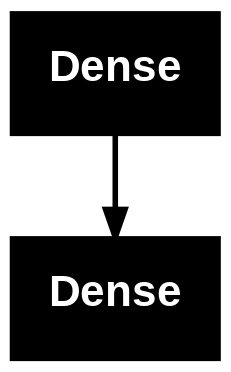

In [8]:
plot_model(model)

In [9]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test set accuracy: {accuracy*100:.2f}%")

Test set accuracy: 86.67%


In [12]:
# If y_train and y_test were one-hot encoded for training, convert them back for plotting
y_train_labels = np.argmax(y_train, axis=1) # quais as classes dado o vetor de probabilidades
y_test_labels = np.argmax(y_test, axis=1)

In [15]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [ ]:
# Plotting decision boundaries - this function needs to be adapted for a neural network
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Predict over the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plotting
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')

319/319 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Training set')

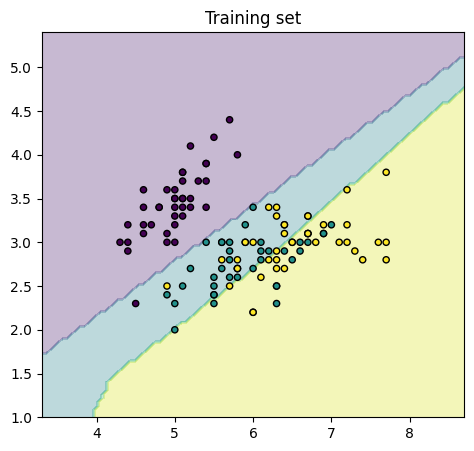

In [ ]:
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
plot_decision_boundary(model, X_train, y_train_labels, ax1)
ax1.set_title('Training set')


319/319 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Test set')

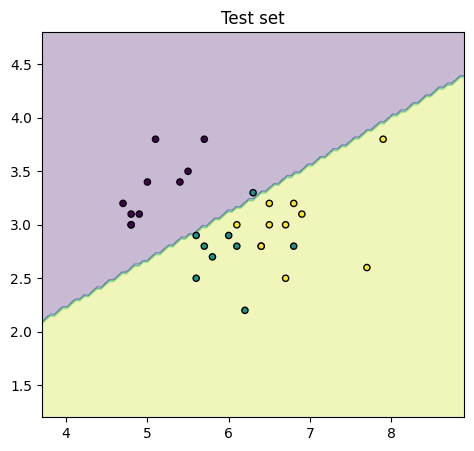

In [ ]:
plt.figure(figsize=(12, 5))
ax2 = plt.subplot(1, 2, 1)
plot_decision_boundary(model, X_test, y_test_labels, ax2)
ax2.set_title('Test set')